### Task How dimensionality reduction using Principal Component Analysis (PCA) on the Wine Quality dataset contributes to improving the classification accuracy and efficiency of wine type.


In [2]:
# Data Loading

import pandas as pd
import numpy as np

wine_data_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv"

wine = pd.read_csv(wine_data_path)
wine.sample(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
513,white,7.4,0.360,0.33,1.4,0.025,27.0,55.0,0.99150,3.21,0.33,11.2,6
3243,white,6.6,0.340,0.24,3.3,0.034,29.0,99.0,0.99031,3.10,0.40,12.3,7
3195,white,7.0,0.210,0.42,5.3,0.037,36.0,123.0,0.99321,3.14,0.52,10.9,6
516,white,6.8,0.180,0.37,1.6,0.055,47.0,154.0,0.99340,3.08,0.45,9.1,5
1752,white,6.1,0.255,0.44,12.3,0.045,53.0,197.0,0.99670,3.24,0.54,9.5,6


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
wine.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [5]:
wine.duplicated().sum()

np.int64(1168)

In [6]:
wine_data = wine.dropna()
wine_data.drop_duplicates(inplace=True)
print("Wine Data Shape (After Dropping) :", wine_data.shape)

Wine Data Shape (After Dropping) : (5295, 13)


C:\Users\HP\AppData\Local\Temp\ipykernel_25776\2829919757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_data.drop_duplicates(inplace=True)


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


X = wine_data.drop("type", axis = 1)
Y = wine_data["type"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=23, test_size=0.2)



In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
knn_no_pca = KNeighborsClassifier(n_neighbors=4)
knn_no_pca.fit(X_train_scaled,Y_train)

,n_neighbors,4
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [10]:
Y_pred_no_pca = knn_no_pca.predict(X_test_scaled)

In [11]:
acc_no_pca = accuracy_score(Y_pred_no_pca, Y_test)
print("KNN having features -", X_train_scaled.shape[1])
print("Classification Accuracy without PCA: {:.2f}%".format(acc_no_pca * 100))



KNN having features - 12
Classification Accuracy without PCA: 99.15%


## using PCA

In [12]:
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [13]:
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca,Y_train)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [14]:
Y_pred_pca = knn_pca.predict(X_test_pca)


In [15]:
acc_pca = accuracy_score(Y_test, Y_pred_pca)
print("KNN having features -", X_train_pca.shape[1])
print("Classification Accuracy with PCA: {:.2f}%".format(acc_pca * 100))

KNN having features - 5
Classification Accuracy with PCA: 99.06%


In [16]:
import plotly.express as px

fig = px.scatter(
    x = X_train_pca[:, 0],   # first principal component
    y = X_train_pca[:, 1],   # second principal component
    color = Y_train.astype(str),  # convert to string for discrete colors
    color_discrete_sequence = px.colors.qualitative.G10,
    labels={'x': 'PCA 1', 'y': 'PCA 2'}
)
fig.show()

In [24]:
pca_1 = PCA(n_components=None)


In [25]:
X_train_trf = pca_1.fit_transform(X_train_scaled)

In [26]:
X_test_trf = pca_1.transform(X_test_scaled)

In [30]:
# Eigen Values
pca_1.explained_variance_.shape

(12,)

In [28]:
# Eigen Vectors
pca_1.components_

array([[-2.80062843e-01, -4.02432856e-01,  1.39355242e-01,
         2.70764366e-01, -3.35127558e-01,  4.11697144e-01,
         4.56826591e-01, -1.75848472e-01, -1.76231916e-01,
        -3.19249844e-01,  1.39122994e-02,  1.10857717e-01],
       [ 2.27955976e-01,  6.16798780e-02,  1.69695609e-01,
         3.68456484e-01,  2.26617912e-01,  1.76638498e-01,
         2.08997531e-01,  5.29813327e-01, -1.78866965e-01,
         7.78261543e-02, -4.92445136e-01, -3.03617204e-01],
       [ 4.61528130e-01, -2.74158091e-01,  5.79596695e-01,
        -7.13538216e-02,  5.84444217e-02, -1.04945070e-01,
        -9.91943088e-02, -5.47802149e-02, -4.25980289e-01,
         1.71553327e-01,  2.13998963e-01,  2.94704126e-01],
       [-1.63938371e-01, -7.26406398e-02,  6.07091261e-02,
         1.72122858e-01,  1.85738957e-01,  2.73004066e-01,
         1.15996273e-01,  1.70033040e-01,  4.53673754e-01,
         5.64450081e-01,  9.68405291e-02,  4.99336824e-01],
       [ 1.99484315e-01,  1.79086772e-01, -1.6414734

In [29]:
np.cumsum(pca_1.explained_variance_ratio_)

array([0.25210378, 0.47003305, 0.60978882, 0.69690287, 0.7689977 ,
       0.82489037, 0.8707926 , 0.91353579, 0.95348957, 0.97803727,
       0.99700293, 1.        ])

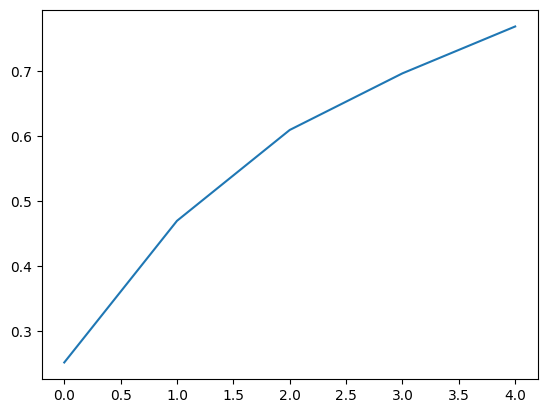

In [33]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
